####### Calculating #######
[[ 135.625   131.375   122.1875 ...,  133.375   132.5     129.25  ]
 [ 133.      136.      123.4375 ...,  131.75    128.      129.125 ]
 [ 135.875   133.125   123.25   ...,  131.375   129.5     126.75  ]
 ..., 
 [ 131.375   128.875   116.625  ...,  125.1875  128.125   128.125 ]
 [ 130.75    125.3125  117.125  ...,  125.5     129.      123.625 ]
 [ 134.375   134.625   123.     ...,  129.375   131.625   132.75  ]]
[0.45270633697509766]
####### Calculating #######
[[ 136.     129.25   130.125 ...,  137.375  135.25   132.   ]
 [ 136.25   124.75   132.375 ...,  133.75   140.     134.125]
 [ 138.125  135.     135.75  ...,  143.     141.375  140.375]
 ..., 
 [ 134.     125.5    128.25  ...,  134.375  131.75   132.   ]
 [ 139.     132.375  132.5   ...,  139.75   135.875  136.5  ]
 [ 136.     130.5    129.25  ...,  138.5    137.     134.875]]
[0.45270633697509766, 0.5674030780792236]
####### Calculating #######
[[ 154.125  146.     155.75  ...,  145.     150.     153

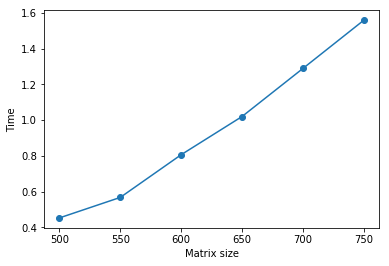

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

def get_times(maximum_time):

    device_times = []
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
            print("####### Calculating #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device("/cpu:0"):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)  
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times.append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(1.5)
cpu_times = device_times

plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()
